# Module 8 - Final Project

You have made it to the end of the course, and you have worked hard to develop your DSA perspectives and skills.  So far we have been internally focused on the operations of performing data science and analytics.  Now we will extend our work to the development of a data story that is externally focused.

In the Module8 labs, you saw simplified examples of constructing data stories. In module4 (Database) there also was an abbreviated example data story.  Throughout the course, there are components and parts useful to consider as a basis for developing a short, unique, focused data story.


For this final project, you will 

- Step 0: Choose your Language for this Adventure

- Step 1: Find a Story

- Step 2: Remember your Audience

- Step 3: Find and Stage Your Data

- Step 4: Vet Data Sources

- Step 5: Filter Results and Build/Validate Models

- Step 6: Visualize Results

- Step 7: Communicate the Story to your intended audience using visualizations and narratives

- Final Step: Connect your workflow/process to the DSA-Project Life Cycle

---
Here are some recommendations for managing the scope and quality of this project:

- Narrow down the issue, problem, question, or hypothesis for you data story to a single, relatively simple perspective.

- Identify already available data that affords addressing your problem.  If using completely new data, know it well.

- Address the data relative to the statistical/machine learning model(s) chosen to minimize any issues.

- Internally document your code using comments that explain the purpose of the operation(s).


Make your project unique by

- Comparing two or more different statistical/machine learning models using the same data.
- Refrain from identically replicating any existing projects obtained from external sources.
- Running a single model multiple times and changing a different single parameter each time for comparison.
- Changing the sampling proportions for building the hold-out data and comparing the same model performance repeatedly.
- Select something you find interesting or unique in the data and write a story around it.




## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview the story you hope to uncover.

## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name(s) of the file(s) that are now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, conduct data carpentry and shaping; perform exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [1]:
import pandas as pd
import numpy as np 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import seaborn as sns
poke=pd.read_csv('pokemon_data.csv')
poke.head()
#poke.describe()

%matplotlib inline
import plotnine 
from plotnine import *


In [2]:
#Creating a score to distinguish the best pokemon
#then sorting it by that score and reseting the index
poke['Score']=poke.iloc[:,4:10].sum(axis=1)
poke=poke.sort_values('Score', ascending=False)
poke=poke.reset_index(drop=True)
poke.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Score
0,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
1,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780
2,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780
3,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,3,True,770
4,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770


In [3]:
print(poke['Type 1'].unique())
#Before setting the correlation of what pokemon are pared together I want to fill in the NaN to 'none'
##It means it's not pared with anything, but I still want to do something with it 
poke['Type 2']=poke['Type 2'].fillna('None')
poke.isna().sum()
#poke.head()
#poke.tail(20)  

['Dragon' 'Psychic' 'Water' 'Ground' 'Normal' 'Steel' 'Rock' 'Ghost'
 'Fire' 'Fairy' 'Dark' 'Grass' 'Fighting' 'Electric' 'Bug' 'Ice' 'Flying'
 'Poison']


#             0
Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
Score         0
dtype: int64

In [4]:
#Fixing column names and types to run correlations
col_names =['Index_Num','Name','Type_1', 'Type_2','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Gen','Legendary','Score']
poke.columns=col_names
poke.head()
print(poke.dtypes)


Index_Num     int64
Name         object
Type_1       object
Type_2       object
HP            int64
Attack        int64
Defense       int64
Sp_Atk        int64
Sp_Def        int64
Speed         int64
Gen           int64
Legendary      bool
Score         int64
dtype: object


In [5]:
#Exploring things that will be of interest to quantify and represent 
poke.describe(include = "all")
#water most freq Type1, Noting most freq Type2
##735 Non-legendary pokemon (65 legendary)
###min score is 180 high 780

,Index_Num,Name,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Gen,Legendary,Score
count,800.000000,800,800,800,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800,800.00000
unique,NaN,800,18,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Riolu,Water,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
freq,NaN,1,112,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN
mean,362.813750,NaN,NaN,NaN,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN,435.10250
std,208.343798,NaN,NaN,NaN,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN,119.96304
min,1.000000,NaN,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN,180.00000
25%,184.750000,NaN,NaN,NaN,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN,330.00000
50%,364.500000,NaN,NaN,NaN,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN,450.00000
75%,539.250000,NaN,NaN,NaN,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN,515.00000


## Step 5: Filter Results and Build and Validate Models


Perform any additional data carpentry and begin filtering results/data and then build, validate, and describe your model(s). 

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [6]:
#Creating another df for the types to see what are pared together most
poke_type1 = pd.DataFrame(poke.groupby("Type_1").Index_Num.nunique().reset_index(name="count"))
poke_type1=poke_type1.sort_values( "count", ascending=False)
poke_type1
Top_Type1=poke_type1.head(10)

poke_type2 = pd.DataFrame(poke.groupby("Type_2").Index_Num.nunique().reset_index(name="count"))
poke_type2=poke_type2.sort_values( "count", ascending=False)
poke_type2
Top_Type2=poke_type2.head(10)
#After no Type_2 the most common is Flying type 

In [7]:
#Combinging Type1 & Type2 to see the most combined 
poke["Combos"]= poke.Type_1 + " " +poke.Type_2 
poke.Combos= poke.Combos.str.strip( )
#looking at unique instances
uniq_poke= poke.groupby("Combos").Index_Num.nunique().reset_index(name='count')
uniq_poke=uniq_poke.sort_values(["count"], ascending = False)
uniq_poke.head(10)
#Top 10- Normal None, Water None, Grass None.. Or just subset it 
Top_10_Combos=uniq_poke.head(10)
Top_10_Combos

,Combos,count
98,Normal None,60
149,Water None,57
73,Grass None,33
116,Psychic None,32
51,Fire None,28
36,Electric None,26
95,Normal Flying,23
44,Fighting None,20
7,Bug None,17
41,Fairy None,15


In [8]:
Great_poke_score=poke[poke['Score']>=515]
Great_poke_score

,Index_Num,Name,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Gen,Legendary,Score,Combos
0,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780,Dragon Flying
1,150,MewtwoMega Mewtwo Y,Psychic,None,106,150,70,194,120,140,1,True,780,Psychic None
2,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780,Psychic Fighting
3,382,KyogrePrimal Kyogre,Water,None,100,150,90,180,160,90,3,True,770,Water None
4,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770,Ground Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,469,Yanmega,Bug,Flying,86,76,86,116,56,95,4,False,515,Bug Flying
199,233,Porygon2,Normal,None,85,80,90,105,95,60,2,False,515,Normal None
200,142,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,515,Rock Flying
201,604,Eelektross,Electric,None,85,115,80,105,80,50,5,False,515,Electric None


In [9]:
#Using subseting top 10 pokemon and seeing if we can use ML to create a cut off for score for Legendary status
##Above we say that the top score pokemon are legendary- I want to create a cut off 
##I will go with the top 75%- which is a score of 515
Top_10_poke=Great_poke_score.head(10)
Top_10_poke

,Index_Num,Name,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Gen,Legendary,Score,Combos
0,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780,Dragon Flying
1,150,MewtwoMega Mewtwo Y,Psychic,None,106,150,70,194,120,140,1,True,780,Psychic None
2,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780,Psychic Fighting
3,382,KyogrePrimal Kyogre,Water,None,100,150,90,180,160,90,3,True,770,Water None
4,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770,Ground Fire
5,493,Arceus,Normal,None,120,120,120,120,120,120,4,True,720,Normal None
6,646,KyuremWhite Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True,700,Dragon Ice
7,646,KyuremBlack Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True,700,Dragon Ice
8,373,SalamenceMega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False,700,Dragon Flying
9,376,MetagrossMega Metagross,Steel,Psychic,80,145,150,105,110,110,3,False,700,Steel Psychic


In [10]:
##203 row total now
### 203*.6=122
#pd.get_dummies(poke['Name'])
#Name_dummies=pd.get_dummies(poke['Name'])
#poke2 = pd.concat([poke, Name_dummies], axis=1)
#poke2.head()
###NVM not typing 800 names... Index_Num is also a unique number associated with the name
pd.get_dummies(Great_poke_score['Combos'])
Combos_dummies=pd.get_dummies(Great_poke_score['Combos'])
poke3 = pd.concat([Great_poke_score, Combos_dummies], axis=1)
train=poke3.sample(n =122, random_state = 1)
test = poke3.drop(train.index)
#head(poke3)
#There are a lot of combos, so I will just pull the 5 of the top pokemon so see if those follow
###I'm also just curious what thos combos & gens look like
###I realized I need to do a correlation on the subset and those steps werent needed
train_X = np.asarray(train[['Index_Num','Score']])
train_y = np.asarray(train.Legendary)
test_X = np.asarray(test[['Index_Num','Score']])
test_y = np.asarray(test.Legendary)

In [35]:
do= tree.DecisionTreeClassifier(criterion='entropy')
do = do.fit(train_X, train_y )
#tree.plot_tree(do)


In [12]:
y_pred = do.fit(train_X, train_y).predict(train_X)
print("Number of non-legendary Pokemon in set {} points : {}"
      .format(len(train),(train_y != y_pred).sum()))
#While there were some non_legendary Pokemon that appeared in the dataset set when looked at 
##that appears to be a small majority
###I will check the testing model then 
y_pred = do.fit(train_X, train_y).predict(test_X)
print("Number of non-legendary Pokemon in set {} points : {}"
      .format(len(test),(test_y != y_pred).sum()))
##So the testing model has seems effective as well 
#This set only has 10 non-legendary pokemon

Number of non-legendary Pokemon in set 122 points : 0
Number of non-legendary Pokemon in set 81 points : 10


In [13]:
#Top_Type1.compare(Top_10_Combos)


In [14]:
#Assigning types to numbers
#['Dragon' 'Psychic' 'Water' 'Ground' 'Normal' 'Steel' 'Rock' 'Ghost'
 #'Fire' 'Fairy' 'Dark' 'Grass' 'Fighting' 'Electric' 'Bug' 'Ice' 'Flying','Poison'] None for the second type 
type_dict= {
    'Dragon':'1',
    'Psychic':'2',
    'Water': '3',
    'Ground': '4',
    'Normal':'5',
    'Steel': '6',
    'Rock': '7',
    'Ghost':'8',
    'Fire': '9',
    'Fairy':'10',
    'Dark': '11',
    'Grass': '12',
    'Fighting':'13',
    'Electric':'14',
    'Bug':'15',
    'Ice':'16',
    'Flying':'17',
    'Poison': '18',
    'Normal': '19'
    
}

In [15]:
[(Top_Type1)for type_dict in zip (Top_Type1)]
Top_Type1.head(10)
print(Top_Type1.dtypes)
##Deciding to just make dummies instead to move on

Type_1    object
count      int64
dtype: object


In [28]:
pd.get_dummies(Top_Type1['Type_1'])
Type1_dummies=pd.get_dummies(Top_Type1['Type_1'])
#Type1_dummies
Type_1 = pd.concat([Great_poke_score, Type1_dummies], axis=1)
#print(Type_1.dtypes)
Type_1=Type_1.iloc[:,10:25]
Type_1.head()

pd.get_dummies(Top_Type2['Type_2'])
Type2_dummies=pd.get_dummies(Top_Type2['Type_2'])
#Type2_dummies
Type_2 = pd.concat([Great_poke_score, Type2_dummies], axis=1)
Type_2=Type_2.replace(np.nan,0)
#print(Type_2.dtypes)
Type_2=Type_2.iloc[:,10:25]
Type_2.head()

pd.get_dummies(Top_10_Combos['Combos'])
Combo_dummies=pd.get_dummies(Top_10_Combos['Combos'])
#Type1_dummies
Top_Combos = pd.concat([Great_poke_score, Combo_dummies], axis=1)
#print(Type_1.dtypes)
Top_Combos=Top_Combos.iloc[:,10:25]
Top_Combos.head()

,Gen,Legendary,Score,Combos,Bug None,Electric None,Fairy None,Fighting None,Fire None,Grass None,Normal Flying,Normal None,Psychic None,Water None
0,3,True,780,Dragon Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,True,780,Psychic None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,True,780,Psychic Fighting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,True,770,Water None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,True,770,Ground Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 6: Visualize Results

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [30]:
# Type_2
#Top_Combos
#Top_10_Poke
#Type_1

#Type_test=Great_poke_score.head(30)

#We see that Psychic has a high correlation with a specific generation
##Legendary with Score, but we already know that 
####But Bug and  have a high correlation with score and low correlation with legendary- infering that they are low score
##and less likely to be legendary
Type_1.corr().style.background_gradient(cmap="Blues")

,Gen,Legendary,Score,Bug,Dark,Electric,Fire,Grass,Ground,Normal,Psychic,Rock,Water
Gen,1,0.152106,-0.0678686,-0.12975,-0.648749,-0.12975,0.389249,-0.12975,-0.12975,0.12975,0.648749,-0.12975,0.12975
Legendary,0.152106,1,0.577956,0.166667,0.166667,0.166667,0.166667,-0.666667,0.166667,-0.666667,0.166667,0.166667,0.166667
Score,-0.0678686,0.577956,1,0.52694,0.52694,0.440556,-0.164129,-0.164129,-0.164129,-0.164129,-0.164129,-0.336896,-0.336896
Bug,-0.12975,0.166667,0.52694,1,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111
Dark,-0.648749,0.166667,0.52694,-0.111111,1,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111
Electric,-0.12975,0.166667,0.440556,-0.111111,-0.111111,1,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111
Fire,0.389249,0.166667,-0.164129,-0.111111,-0.111111,-0.111111,1,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111
Grass,-0.12975,-0.666667,-0.164129,-0.111111,-0.111111,-0.111111,-0.111111,1,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111
Ground,-0.12975,0.166667,-0.164129,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,1,-0.111111,-0.111111,-0.111111,-0.111111
Normal,0.12975,-0.666667,-0.164129,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,1,-0.111111,-0.111111,-0.111111


In [27]:
Type_2.corr().style.background_gradient(cmap="Greys")
#You dont see any significant correlation here at all

,Gen,Legendary,Score,Dark,Fairy,Fighting,Flying,Grass,Ground,None,Poison,Psychic,Steel
Gen,1,0.152106,-0.0678686,-0.109363,-0.0191162,0.0260069,0.0711301,-0.0191162,-0.0191162,0.0260069,0.116253,-0.0191162,0.0260069
Legendary,0.152106,1,0.577956,0.10252,0.10252,0.10252,0.10252,-0.0482882,0.10252,-0.0482882,0.10252,0.10252,0.10252
Score,-0.0678686,0.577956,1,0.220821,0.209492,0.152847,0.130189,0.130189,0.130189,0.130189,0.130189,0.107531,0.107531
Dark,-0.109363,0.10252,0.220821,1,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505
Fairy,-0.0191162,0.10252,0.209492,-0.0049505,1,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505
Fighting,0.0260069,0.10252,0.152847,-0.0049505,-0.0049505,1,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505
Flying,0.0711301,0.10252,0.130189,-0.0049505,-0.0049505,-0.0049505,1,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505
Grass,-0.0191162,-0.0482882,0.130189,-0.0049505,-0.0049505,-0.0049505,-0.0049505,1,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505
Ground,-0.0191162,0.10252,0.130189,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505,1,-0.0049505,-0.0049505,-0.0049505,-0.0049505
None,0.0260069,-0.0482882,0.130189,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505,-0.0049505,1,-0.0049505,-0.0049505,-0.0049505


In [19]:
Top_Combos.corr().style.background_gradient(cmap="BuPu")
##See bug none and score have a high correlation, but lower for legendary

,Gen,Legendary,Score,Bug None,Electric None,Fairy None,Fighting None,Fire None,Grass None,Normal Flying,Normal None,Psychic None,Water None
Gen,1,0.152106,-0.0678686,0.364932,-0.757937,0.0842152,-0.196502,-0.196502,0.0842152,0.364932,0.364932,-0.196502,0.0842152
Legendary,0.152106,1,0.577956,0.408248,-0.272166,-0.272166,-0.272166,0.408248,0.408248,0.408248,-0.272166,-0.272166,-0.272166
Score,-0.0678686,0.577956,1,0.741663,0.235984,0.167027,0.113395,-0.0245178,-0.0245178,-0.177754,-0.177754,-0.292681,-0.560844
Bug None,0.364932,0.408248,0.741663,1,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111
Electric None,-0.757937,-0.272166,0.235984,-0.111111,1,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111
Fairy None,0.0842152,-0.272166,0.167027,-0.111111,-0.111111,1,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111
Fighting None,-0.196502,-0.272166,0.113395,-0.111111,-0.111111,-0.111111,1,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111
Fire None,-0.196502,0.408248,-0.0245178,-0.111111,-0.111111,-0.111111,-0.111111,1,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111
Grass None,0.0842152,0.408248,-0.0245178,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,1,-0.111111,-0.111111,-0.111111,-0.111111
Normal Flying,0.364932,0.408248,-0.177754,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,1,-0.111111,-0.111111,-0.111111


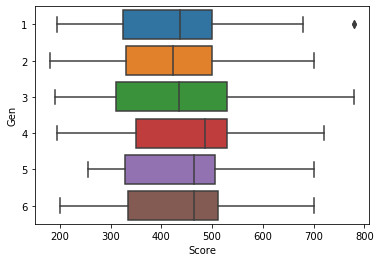

In [20]:
sns.boxplot(x='Score', y='Gen', data= poke, orient='h')
#looks like Gen 4 has the highest average score

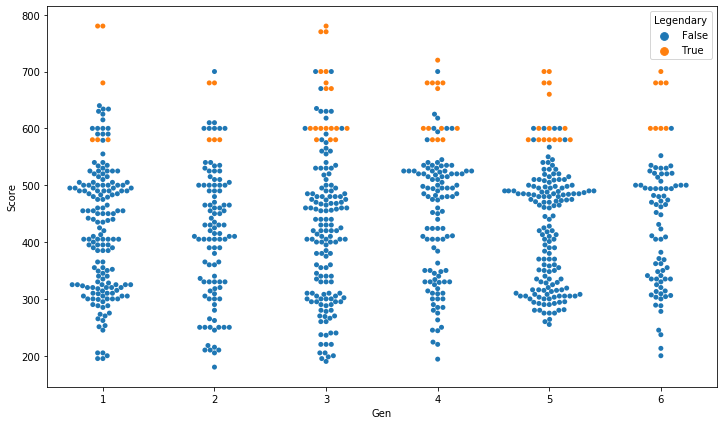

In [21]:
plt.rcParams["figure.figsize"] = [12.00, 7.00]
sns.swarmplot(x='Gen', y='Score', data=poke, hue='Legendary')
#While Gen 4 has a higher average score, it looks like Gen 3 and 1 have the highets pokemon



/opt/conda/lib/python3.7/site-packages/plotnine/stats/stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)
/opt/conda/lib/python3.7/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/opt/conda/lib/python3.7/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


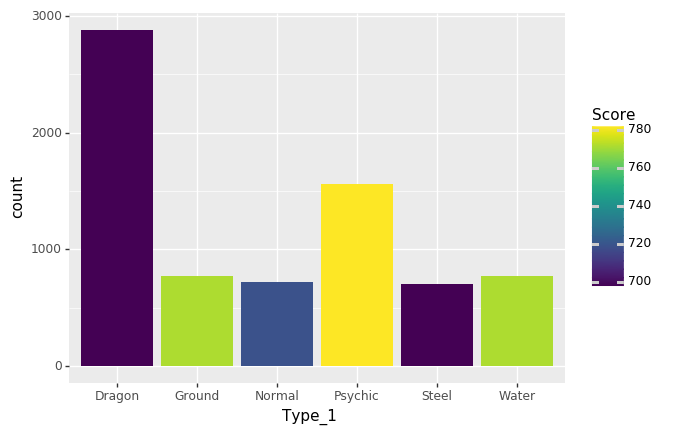

<ggplot: (8753765745181)>


/opt/conda/lib/python3.7/site-packages/plotnine/stats/stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)
/opt/conda/lib/python3.7/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/opt/conda/lib/python3.7/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


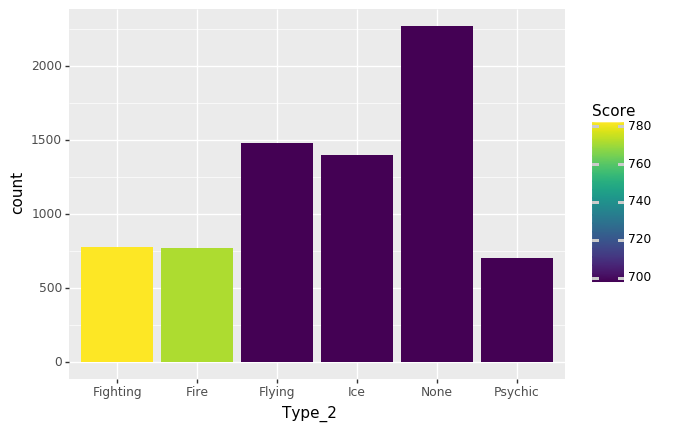

<ggplot: (8753765741106)>


/opt/conda/lib/python3.7/site-packages/plotnine/stats/stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)
/opt/conda/lib/python3.7/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/opt/conda/lib/python3.7/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


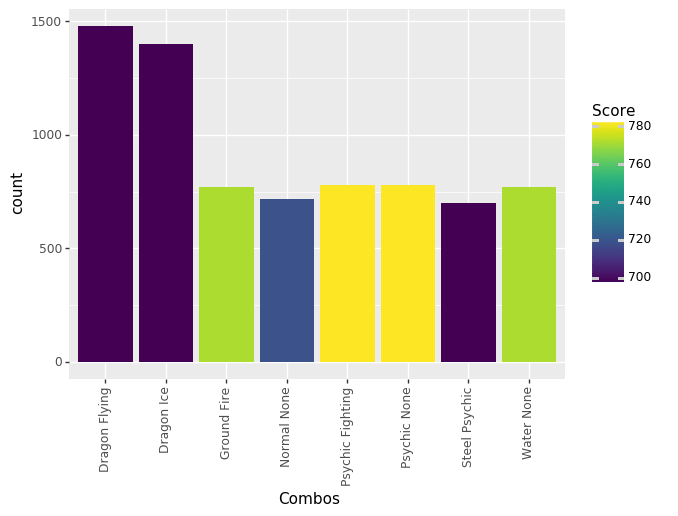

<ggplot: (-9223363283088972586)>


In [33]:
###LOOKING AT COMBOS AND TOP TYPES TO SEE THE RELATIONSHIPS BETWEEN TYPES AND POWERS########

TopPo = ggplot(data=Top_10_poke, mapping = aes(x='Type_1', weight = "Score",sort=False))+geom_bar(mapping=aes(fill = 'Score'))
TopPo= TopPo
print(TopPo)
#Seems like Dragon flying is a powerful combo
#Top1=ggplot(data=Top_Type1, mapping = aes(x='Type_1'))+ geom_histogram(binwidth=10, mapping=aes(fill = ('count')))


Top1=ggplot(Top_10_poke, aes(x="Type_2", weight = "Score",sort=False)) + geom_bar(aes(fill="Score"))
print(Top1)

Top2=ggplot(Top_10_poke, aes(x="Combos", weight = "Score",sort=False)) + geom_bar(aes(fill="Score"))
Top2=Top2+theme(axis_text_x=element_text(angle=90))
print(Top2)


In [23]:
###To better see this I will subset the Great_poke_score is too big to do this and the Top_10_poke is too small 
#Type_test=Great_poke_score.head(30)
#types=ggplot(Type_test, aes(x="Type_1", y="Type_2")) + geom_point(color="Blue")+ facet_grid(["Gen","Score"]) 
#types=types+theme(axis_text_x=element_text(angle=90))
#types=types+theme(axis_text_y=element_text(angle=-50))
#types

#I am doing the same thing above and it's easier to see 

## Step 7: Communicate the Story to your intended audience using visualizations and narrative


In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel (the slack course channel). 

Feel free to post more examples for people to look at and provide feedback. Your classmates will be vital providers of feedback in this process. Utilize them.

# Final Step: Connect your workflow/process to the DSA-Project Life Cycle
- List and briefly discuss how important details from each stage of the [DSA-PLC](../../module1/resources/DSA-ProjectLifecycle-slidedeck.pdf) played a role in your story development.
- Use markdown to provide this overview below:
<hr/>

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>



1. Project defenition
Stakeholders-Players working to play competitively or casually
As a TCG player (MTG) I like to think evaluate my decks and playabilty in certain groups. Knowing your power level is important.You dont want a competitive deck in a low powered pod and vis versa. Additionally knowing powerful types and combos can help you asses threats and know types you want to build your deck around. When wanting to tweak your deck it is also beinifcial to know what generations of cards would be the most benificial to explore. 

The timeframe I had to do this was for Friday so I started this on last Saturday to have plenty of time and abilty to problem solve things. I needed to access the dataset from GitHub (but also on Kaggle), then upload it in my jupyter notebook accuratly. I subst data to explore the types and scores to explore the questions I wanted to. It was hard to find the right way to turn my types into numbers and I just had to think of what I have in my tool set and use that. 

2. Data Acquisition
I was able to get the data easily through GitHub as stated above and upload to jupyter hub from my home. I didnt know it was on Kaggle at first so I had to use my GitHub desktop to get the .csv 

3. Data Carpentry
I had to fill in my NAN's for my Type_2 since if there was not one associated with it and fill it with "none". Along with creating my score variable and subseting the variables I wanted to expolre. 

4. Exploratory Data/Vis
This was done visually withe the correlation tables I created to explore realtions between types and there association with scores or legendary status. 

5. ML/testing
This is where I tested if my hypotesis of the top 25% being the legendary Pokemon with using the testing and training model. 

6. ML/validation 
This is where I checked the number of mislabeled points in each set to see if it was accurate. It was so I didnt need to test it with a different size or a completely different set.

7. Data Story
This was done with the visualizations and the discription that I gave above. 

8. Deployment
This happens when I turn this in after finishing it. We will get a follow up from our grade. Hoping that there are no technical issues with uploading it. 

# Save your notebook, then `File > Close and Halt`